sources
- http://www.multpl.com/shiller-pe/faq
- http://www.econ.yale.edu/~shiller/data.htm - use this link for source
- http://www.econ.yale.edu/~shiller/data/ie_data.xls

In [180]:
%matplotlib inline
from matplotlib.pyplot import *

import numpy as np
import scipy as sp
import pandas as pd
from datetime import datetime

In [277]:
data = pd.read_csv('data.csv', skiprows=7)
data = data[['Date', 'Price', 'CAPE']]

data = data.dropna()

data['Date'] = [datetime.strptime(str(d), "%Y.%m") for d in data['Date']]

data = data.sort_values("Date")

data['future_price'] = np.nan
years = 10
months = 12*years
data.iloc[:-months, list(data.columns).index('future_price')] = data.Price.values[months:]

In [291]:
rets = (data['future_price'] - data['Price']) / data['Price']
rets = np.sign(rets) * ((1 + np.abs(rets))**(1/float(years)) - 1)
data['returns'] = rets

ys = data[data.Date < '1980-01-01']

y80s = data[(data.Date >= '1980-01-01') & (data.Date < '1990-01-01')]
y90s = data[(data.Date >= '1990-01-01') & (data.Date < '2000-01-01')]
y00s = data[(data.Date >= '2000-01-01') & (data.Date < '2010-01-01')]

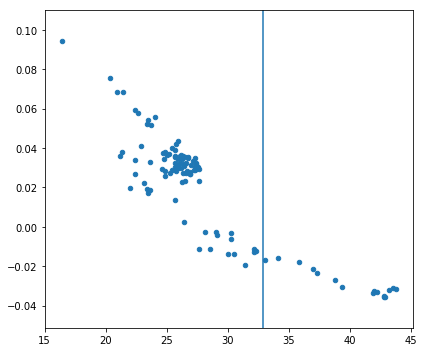

In [293]:
figure(figsize=(6, 5))

# scatter(ys['CAPE'], ys['returns'], s=20, alpha=0.1)

# scatter(y80s['CAPE'], y80s['returns'], s=20)
# scatter(y90s['CAPE'], y90s['returns'], s=20)
scatter(y00s['CAPE'], y00s['returns'], s=20)

axvline(data.iloc[-1].CAPE)

tight_layout()

# savefig('vis.svg')

In [295]:
y00s.sort_values('CAPE')

,Date,Price,CAPE,future_price,returns
1658,2009-03-01,897.88,13.32,NaN,NaN
1657,2009-02-01,957.24,14.12,NaN,NaN
1659,2009-04-01,1003.31,14.98,NaN,NaN
1656,2009-01-01,1034.10,15.17,NaN,NaN
1654,2008-11-01,1048.59,15.26,NaN,NaN
1655,2008-12-01,1052.98,15.38,NaN,NaN
1660,2009-05-01,1064.43,16.00,NaN,NaN
1661,2009-06-01,1083.09,16.38,NaN,NaN
1653,2008-01-01,1128.40,16.39,2785.68,0.094578
1662,2009-07-01,1096.17,16.69,NaN,NaN


In [296]:
data

,Date,Price,CAPE,future_price,returns
120,1881-01-01 00:00:00,165.77,18.47,176.64,0.006371
129,1881-01-01 00:00:00,150.97,16.26,156.49,0.003598
121,1881-02-01 00:00:00,163.58,18.15,156.52,-0.004234
122,1881-03-01 00:00:00,165.44,18.27,151.81,-0.007948
123,1881-04-01 00:00:00,163.27,17.95,155.02,-0.004942
124,1881-05-01 00:00:00,172.33,18.87,156.23,-0.008972
125,1881-06-01 00:00:00,174.45,19.03,156.81,-0.009679
126,1881-07-01 00:00:00,166.69,18.12,156.13,-0.006161
127,1881-08-01 00:00:00,159.59,17.29,161.36,0.001104
128,1881-09-01 00:00:00,154.86,16.72,176.64,0.013246
